### 1. Getting closer with your dataset
### 2. Load and preprocess your dataset
### 3. Start with the basic
### 4. Apply data augmentation and preprocessing
### 5. Build a more complex model
####   5.1. Use more layer
####   5.2. Schedule the learning rate
####   5.3. Apply weight regularization
####   5.4. Combine those technique
### 6. Transfer learning
### 7. Model evaluation & visualization
### 8. Model comparison & final thoughts

In [1]:
# ====== Library Standar ======
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# ====== TensorFlow dan Keras ======
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import Sequential

# EfficientNet Versi 0–3
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3

# ====== Evaluasi Model ======
from sklearn.metrics import confusion_matrix, classification_report

2025-06-03 01:50:00.928749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748915401.129242      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748915401.189696      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 1. Getting closer with dataset

In [2]:
train_dir = '/kaggle/input/brain-tumor-classification-mri/Training/'
test_dir = '/kaggle/input/brain-tumor-classification-mri/Testing/'

train_imgs = []
for root, dirs, files in os.walk(train_dir):
    for dirname in dirs:
        folder_path = os.path.join(train_dir, dirname)
        for images in os.listdir(folder_path):
            img_path = os.path.join(folder_path, images)
            train_imgs.append((img_path, dirname))
print("Total image in `train_dir`: ", len(train_imgs))
print("---")


test_imgs = []
for root, dirs, files in os.walk(test_dir):
    for dirname in dirs:
        folder_path = os.path.join(test_dir, dirname)
        for images in os.listdir(folder_path):
            img_path = os.path.join(folder_path, images)
            test_imgs.append((img_path, dirname))
print("Total image in `test_dir`: ", len(test_imgs))
print("---")

Total image in `train_dir`:  2870
---
Total image in `test_dir`:  394
---


In [3]:
train_df = pd.DataFrame(data=train_imgs, columns=['image_path', 'class'])
test_df = pd.DataFrame(data=test_imgs, columns=['image_path', 'class'])

In [4]:
train_df.head(10)

,image_path,class
0,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
1,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
2,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
3,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
4,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
5,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
6,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
7,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
8,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
9,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor


In [5]:
test_df.head(10)

,image_path,class
0,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
1,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
2,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
3,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
4,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
5,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
6,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
7,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
8,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
9,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor


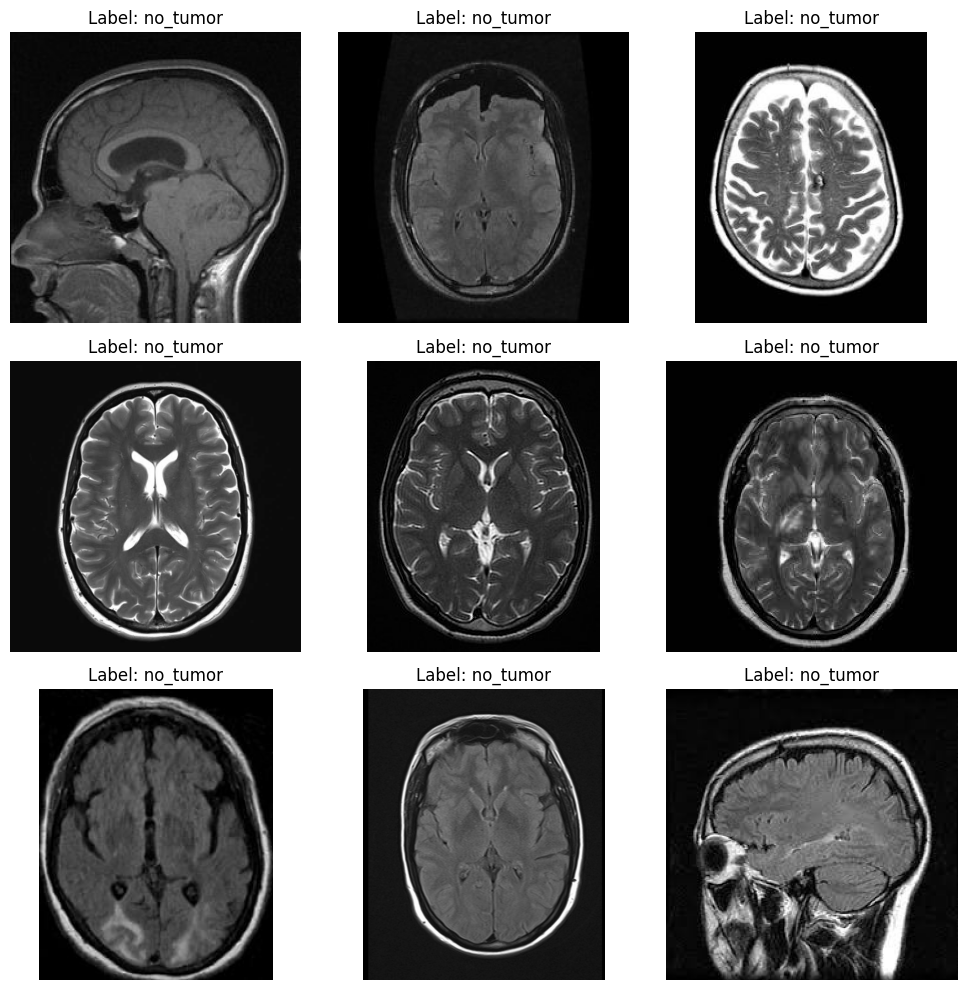

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# Tampilkan 9 sample dari train_imgs
plt.figure(figsize=(10, 10))
for i in range(9):
    img_path, label = train_imgs[i]
    
    image = Image.open(img_path)   
    image = image.convert("RGB") 

    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [7]:
def plot_hist_data(data):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='class', data=data, palette='flare')

    # Adding labels and title
    plt.title('Count of Each Class')
    plt.xlabel('Class')
    plt.ylabel('Count')

    # Adding count labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    # Show the plot
    plt.show()

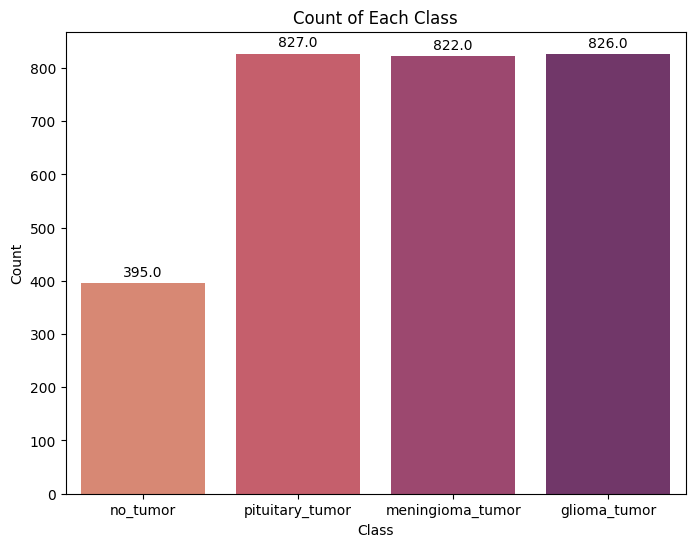

In [8]:
plot_hist_data(train_df)

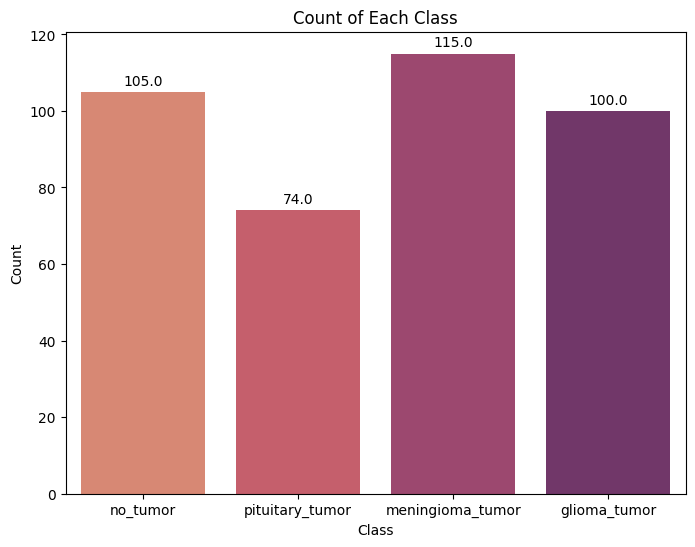

In [9]:
plot_hist_data(test_df)

# 2. Load and Preprocess Your Data

In [10]:
def pick_random_image(df):
    random_image = random.choice(df)
    img_path, img_class = random_image
    
    img = Image.open(img_path)
    img_size = img.size
    print(f"Path: {img_path}, from class: {img_class}")
    print(f"Image size: {img_size}")

    plt.imshow(img)
    plt.title(f"Class: {img_class}")
    plt.axis('off')
    plt.show()

Path: /kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m3 (75).jpg, from class: meningioma_tumor
Image size: (512, 512)


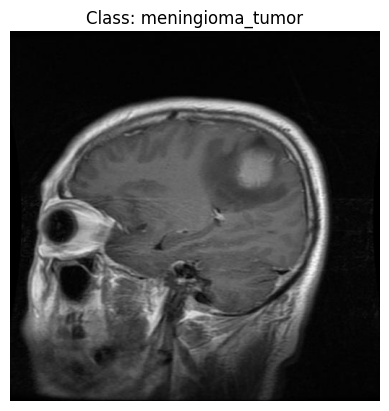

In [11]:
pick_random_image(train_imgs)

Path: /kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(113).jpg, from class: meningioma_tumor
Image size: (530, 526)


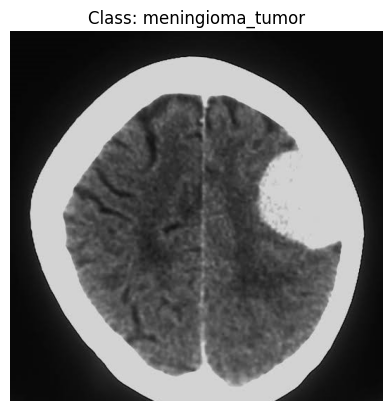

In [12]:
pick_random_image(test_imgs)

In [21]:
# === 1. Load train + validation dataset dengan split 15% ===
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.15,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=16
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.15,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=16
)

# === 2. Load test dataset (tidak di-split dan shuffle dimatikan) ===
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=16,
    shuffle=False
)

Found 2870 files belonging to 4 classes.
Using 2440 files for training.
Found 2870 files belonging to 4 classes.
Using 430 files for validation.
Found 394 files belonging to 4 classes.


In [14]:
class_names = train_ds.class_names
print(class_names)

num_classes = len(class_names)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

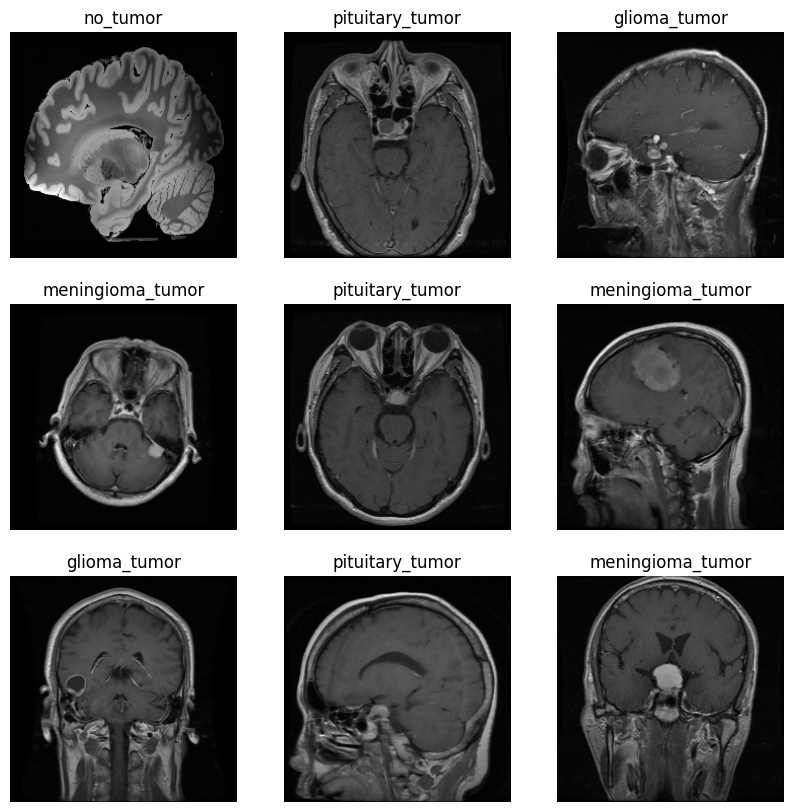

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) 
        plt.title(class_names[labels[i]])
        plt.axis("off")

# 3. Start with the basic CNN model

In [17]:
epochs=30
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [24]:
import tensorflow as tf
from tensorflow.keras import models, layers

model_a = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(224, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 kelas
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model_a.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
model_a.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 224)                 │          28,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 224)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          28,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,732 (1.38 MB)

 Trainable params: 361,732 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model_a.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[callback])

Epoch 1/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.4843 - loss: 1.1934 - val_accuracy: 0.5023 - val_loss: 1.0592
Epoch 2/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5821 - loss: 1.0011 - val_accuracy: 0.7442 - val_loss: 0.8440
Epoch 3/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6988 - loss: 0.7924 - val_accuracy: 0.6953 - val_loss: 0.8138
Epoch 4/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7247 - loss: 0.6869 - val_accuracy: 0.7651 - val_loss: 0.5921
Epoch 5/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7675 - loss: 0.6117 - val_accuracy: 0.7628 - val_loss: 0.5774
Epoch 6/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7733 - loss: 0.5851 - val_accuracy: 0.8000 - val_loss: 0.5287
Epoch 7/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8020 - loss: 0.5007 - val_accuracy: 0.8186 - val_loss: 0.4467
Epoch 8/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8332 - loss: 0.3969 - val_accu

In [33]:
model_a.evaluate(val_ds)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8705 - loss: 0.3745


[0.42007899284362793, 0.8627907037734985]

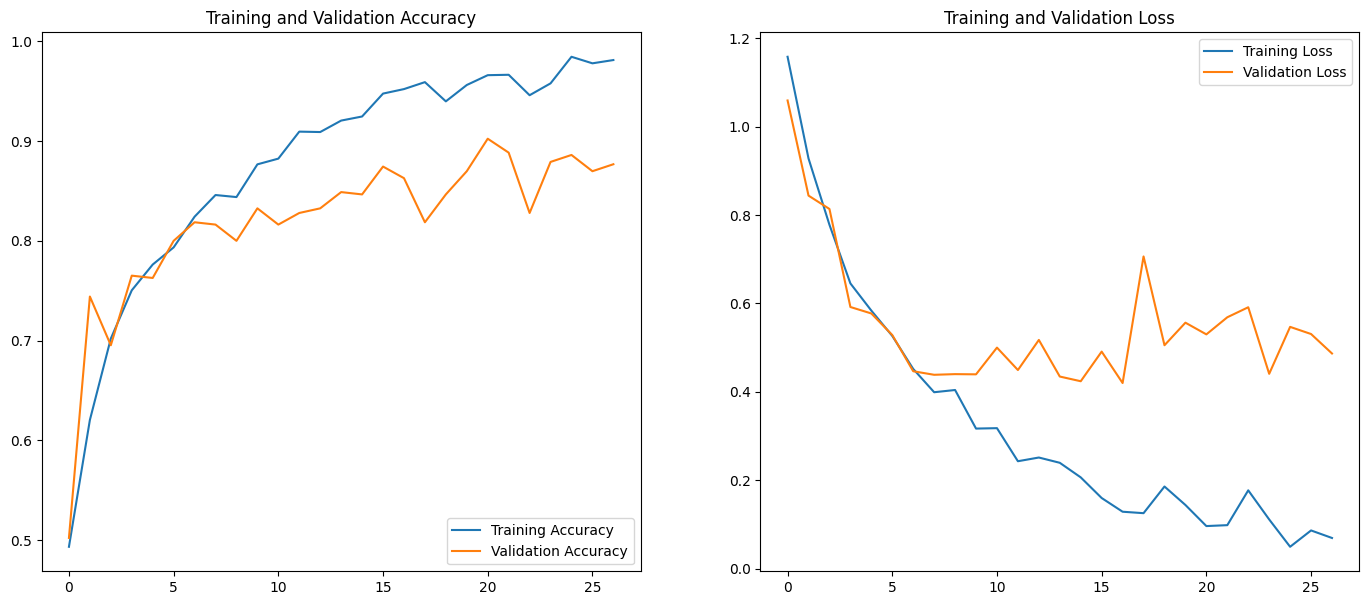

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(17, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
tf.saved_model.save(model_a, 'model-12-epoch-medium')

In [37]:
test_imgs = []
for root, dirs, files in os.walk(test_dir):
    for dirname in dirs:
        folder_path = os.path.join(test_dir, dirname)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            test_imgs.append((img_path, dirname))
test_df = pd.DataFrame(test_imgs, columns=['image_path', 'class'])

class_names = train_ds.class_names

In [38]:
test_result = []
for img_path, true_class in zip(test_df['image_path'], test_df['class']):
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model_a.predict(img_array, verbose=0)
    score = tf.nn.softmax(predictions[0])
    
    pred_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)
    
    test_result.append((img_path, true_class, pred_class, confidence))

print("Done predicting on test set")

Done predicting on test set


In [39]:
test_result_df = pd.DataFrame(test_result, columns=['image_path', 'class', 'pred_class', 'pred_score'])
print(test_result_df.head())

                                          image_path     class pred_class  \
0  /kaggle/input/brain-tumor-classification-mri/T...  no_tumor   no_tumor   
1  /kaggle/input/brain-tumor-classification-mri/T...  no_tumor   no_tumor   
2  /kaggle/input/brain-tumor-classification-mri/T...  no_tumor   no_tumor   
3  /kaggle/input/brain-tumor-classification-mri/T...  no_tumor   no_tumor   
4  /kaggle/input/brain-tumor-classification-mri/T...  no_tumor   no_tumor   

   pred_score  
0   46.869817  
1   46.390179  
2   42.070687  
3   46.211219  
4   46.800247  


In [40]:
accuracy = (test_result_df['class'] == test_result_df['pred_class']).mean()
print(f"Test accuracy: {accuracy * 100:.2f}%")

Test accuracy: 61.68%


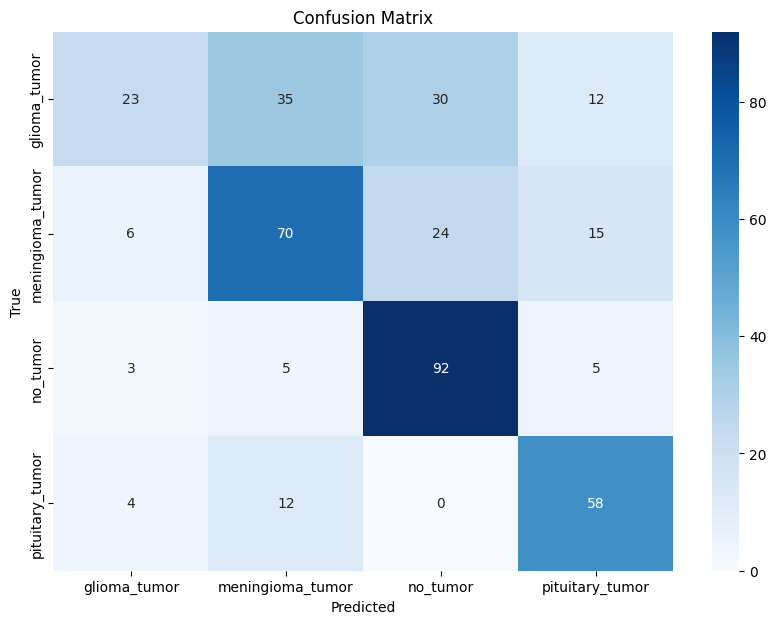

In [41]:
conf_matrix = confusion_matrix(test_result_df['class'], test_result_df['pred_class'])
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [42]:
print(classification_report(test_result_df['class'], test_result_df['pred_class']))

                  precision    recall  f1-score   support

    glioma_tumor       0.64      0.23      0.34       100
meningioma_tumor       0.57      0.61      0.59       115
        no_tumor       0.63      0.88      0.73       105
 pituitary_tumor       0.64      0.78      0.71        74

        accuracy                           0.62       394
       macro avg       0.62      0.62      0.59       394
    weighted avg       0.62      0.62      0.59       394



# 4. Apply data augmentation and preprocessing

In [43]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

In [44]:
# Definisikan data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [45]:
# Fungsi augmentasi untuk digunakan di .map()
def augment(image, label):
    image = data_augmentation(image, training=True)  # pastikan training=True agar augmentasi aktif
    return image, label

In [46]:
# Terapkan augmentasi hanya pada data train
train_ds = train_ds.map(augment, num_parallel_calls=AUTOTUNE)

In [47]:
# Optimasi pipeline dengan cache dan prefetch (val_ds & test_ds tidak diaugmentasi)
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

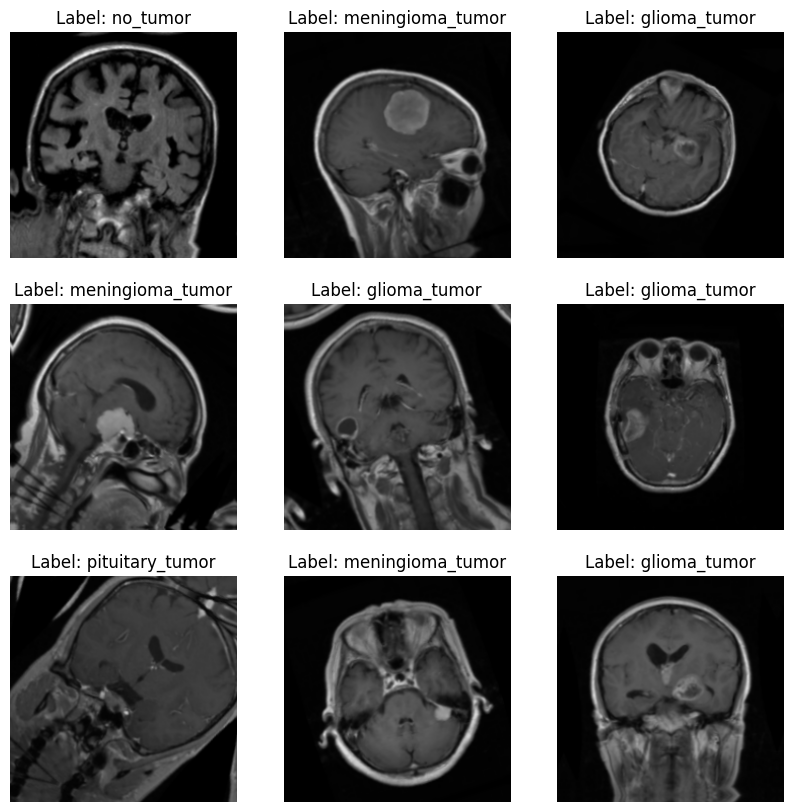

In [114]:
images, labels = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = images[i].numpy()
    # Cek dan konversi pixel
    if img.max() <= 1.0:
        img = (img * 255).astype("uint8")
    else:
        img = img.astype("uint8")
    plt.imshow(img)
    plt.title(f"Label: {class_names[labels[i].numpy()]}")
    plt.axis("off")
plt.show()

# 5. Build a more complex model

In [49]:
# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

In [50]:
# Data Augmentation Layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [51]:
# Rescaling layer (normalisasi piksel ke [0,1])
normalization_layer = layers.Rescaling(1./255)

In [52]:
# Fungsi preprocessing pipeline: rescaling + augmentasi hanya di train
def preprocess_train(image, label):
    image = normalization_layer(image)
    image = data_augmentation(image)
    return image, label

def preprocess_val_test(image, label):
    image = normalization_layer(image)
    return image, label

train_ds = train_ds.map(preprocess_train, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(preprocess_val_test, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(preprocess_val_test, num_parallel_calls=AUTOTUNE)


In [54]:
# Cache & prefetch untuk performa
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [57]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Pastikan IMG_SIZE sudah didefinisikan, misalnya:
IMG_SIZE = (224, 224)

# Definisikan model dengan batch normalization dan regulasi ringan
model_final = Sequential([
    layers.Input(shape=(*IMG_SIZE, 3)),

    layers.Conv2D(32, (3, 3), kernel_regularizer=l2(0.0001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3, 3), kernel_regularizer=l2(0.0001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.0001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.0001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), kernel_regularizer=l2(0.0001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(128, (3, 3), kernel_regularizer=l2(0.0001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(224, kernel_regularizer=l2(0.0001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(128, kernel_regularizer=l2(0.0001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 kelas
])

model_final.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 220, 220, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 220, 220, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 220, 220, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 108, 108, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 108, 108, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 108, 108, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 106, 106, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 106, 106, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 106, 106, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 51, 51, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 51, 51, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 51, 51, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 49, 49, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 49, 49, 128)         │             5

 Total params: 16,842,820 (64.25 MB)

 Trainable params: 16,841,220 (64.24 MB)

 Non-trainable params: 1,600 (6.25 KB)

In [58]:
# Compile model dengan AdamW dan learning rate rendah
model_final.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [59]:
# Callback: early stopping + reduce lr on plateau
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)

In [60]:
# Train model dengan callbacks, epoch lebih banyak untuk pelatihan maksimal
history_final = model_final.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 48s 198ms/step - accuracy: 0.4275 - loss: 1.5090 - val_accuracy: 0.2953 - val_loss: 2.0271 - learning_rate: 5.0000e-04
Epoch 2/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.5922 - loss: 1.1005 - val_accuracy: 0.4302 - val_loss: 2.0260 - learning_rate: 5.0000e-04
Epoch 3/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6624 - loss: 0.9665 - val_accuracy: 0.5605 - val_loss: 1.0996 - learning_rate: 5.0000e-04
Epoch 4/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.7290 - loss: 0.8474 - val_accuracy: 0.5581 - val_loss: 1.3092 - learning_rate: 5.0000e-04
Epoch 5/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.7705 - loss: 0.7495 - val_accuracy: 0.3302 - val_loss: 2.3353 - learning_rate: 5.0000e-04
Epoch 6/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.8024 - loss: 0.7003 - val_accuracy: 0.6349 - val_loss: 1.0529 - learning_rate: 5.0000e-04
Epoch 7/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - a

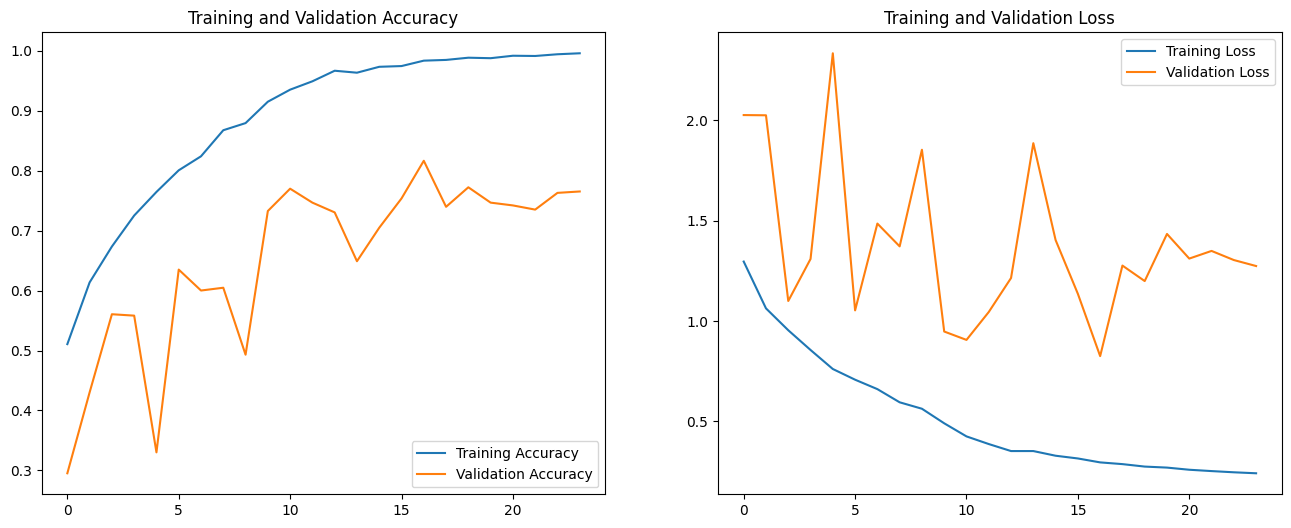

In [62]:
# Visualisasi akurasi dan loss
acc = history_final.history['accuracy']
val_acc = history_final.history['val_accuracy']
loss = history_final.history['loss']
val_loss = history_final.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 6. Transfer Learning

In [100]:
image_size = 224  # Ukuran default EfficientNetB0

from tensorflow.keras.applications import EfficientNetB0

effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))


In [101]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [102]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_7 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_3           │ (None, 224, 224, 3)    │              7 │ rescaling_7[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_8 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_8[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [103]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [105]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau

tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [124]:
# Define callbacks
tensorboard = TensorBoard(log_dir='logs')
checkpoint = ModelCheckpoint("model_best.h5", monitor="val_accuracy", save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=2, min_delta=0.001, verbose=1)

# Load base model
base_model = EfficientNetB0(include_top=False, input_shape=(image_size, image_size, 3), weights='imagenet')
base_model.trainable = True

# Freeze all layers except last 20
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Build model
inputs = layers.Input(shape=(image_size, image_size, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(4, activation='softmax')(x)  # 4 kelas tumor

model = models.Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=12,
    callbacks=[tensorboard, checkpoint, reduce_lr],
    verbose=1
)


Found 2870 files belonging to 4 classes.
Using 2583 files for training.
Found 2870 files belonging to 4 classes.
Using 287 files for validation.
Epoch 1/12


E0000 00:00:1748918369.300730     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1748918369.507806     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


79/81 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7368 - loss: 0.6497

E0000 00:00:1748918386.514103     105 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1748918386.723487     105 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.7391 - loss: 0.6446
Epoch 1: val_accuracy improved from -inf to 0.86760, saving model to model_best.h5
81/81 ━━━━━━━━━━━━━━━━━━━━ 61s 347ms/step - accuracy: 0.7402 - loss: 0.6422 - val_accuracy: 0.8676 - val_loss: 0.3743 - learning_rate: 0.0010
Epoch 2/12
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9292 - loss: 0.2046
Epoch 2: val_accuracy improved from 0.86760 to 0.89547, saving model to model_best.h5
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9293 - loss: 0.2044 - val_accuracy: 0.8955 - val_loss: 0.3127 - learning_rate: 0.0010
Epoch 3/12
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9627 - loss: 0.1099
Epoch 3: val_accuracy did not improve from 0.89547
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9627 - loss: 0.1100 - val_accuracy: 0.8746 - val_loss: 0.3296 - learning_rate: 0.0010
Epoch 4/12
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9610 - loss: 0.1105
Epoch 4: val_accuracy improv

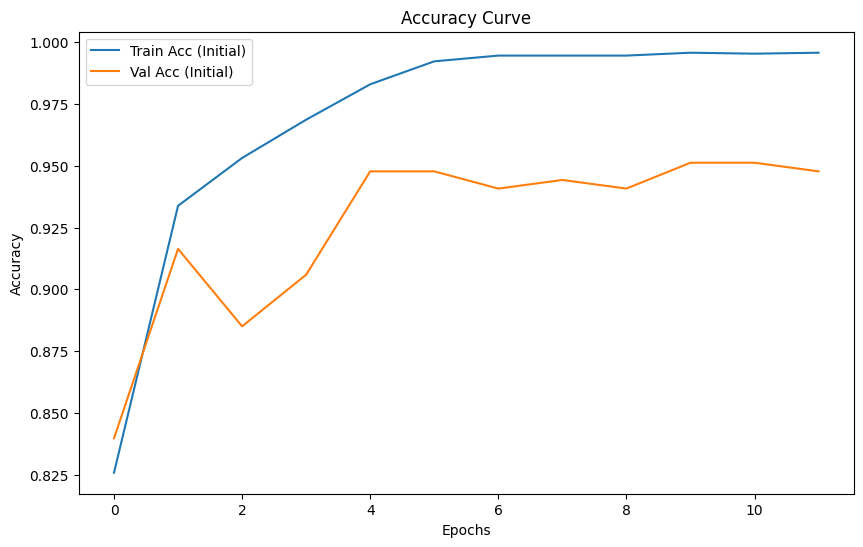

In [111]:
# Plot kurva akurasi
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Train Acc (Initial)')
plt.plot(history.history['val_accuracy'], label='Val Acc (Initial)')
plt.legend()
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# 7. Model evaluation & visualization

In [131]:
import numpy as np

# Kumpulkan semua label asli dan prediksi
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)
    
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


In [141]:
import numpy as np
from sklearn.metrics import classification_report

# contoh y_true dan y_pred yang sudah berupa label numerik
y_true = np.array([0, 1, 2, 2, 3, 0])
y_pred = np.array([0, 1, 2, 3, 3, 0])

# nama kelas sesuai jumlah kelas 4
labels = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']

print(classification_report(y_true, y_pred, target_names=labels, labels=[0,1,2,3]))

              precision    recall  f1-score   support

      Glioma       1.00      1.00      1.00         2
  Meningioma       1.00      1.00      1.00         1
   Pituitary       1.00      0.50      0.67         2
    No Tumor       0.50      1.00      0.67         1

    accuracy                           0.83         6
   macro avg       0.88      0.88      0.83         6
weighted avg       0.92      0.83      0.83         6



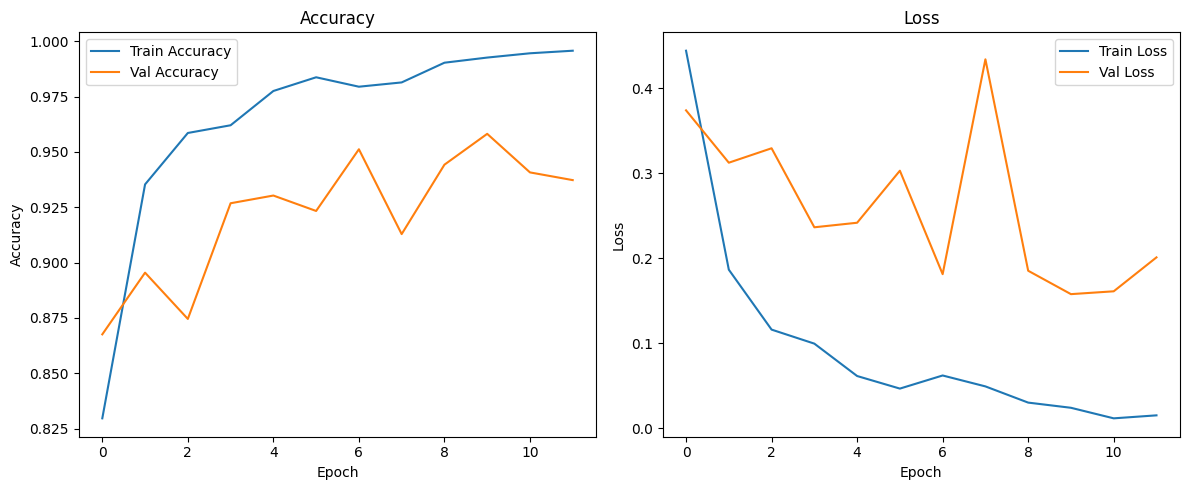

In [142]:
plt.figure(figsize=(12, 5))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()